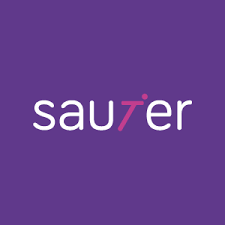

# Desafio Case Python Sauter - Capturar dados de Loja de Aplicativo - Google Play

- Autor: Cícero Henrique dos Santos
- E-mail: cicerooficial@gmail.com
- Linkedin: https://www.linkedin.com/in/cicero-henrique-santos/
- GitHub: https://github.com/cicerooficial
- Repositório deste projeto completo: https://github.com/cicerooficial/desafio-case-python-sauter

------

          1. As análises contidas neste notebook fazem parte do desafio promovido pela Sauter Tecnologia.
          2. O dataset são dados reais, extraídos do Google Play, contendo informações de avaliação do aplicativo Alexa.
          3. Buscando facilitar o entendimento, este projeto foi desenvolvido por seções e subseções.
          4. Nos códigos foi incluido comentários, com objetivo de facilitar o entendimento do raciocínio no desenvolvimento deste notebook.

### Importação de Bibliotecas

In [41]:
!pip install -qq google-play-scraper                                                      # Instalação da biblioteca google-play-scraper
!pip install -qq https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  # Instalação da biblioteca pandas-profiling
!pip install google-auth
!pip install google-cloud-storage

In [3]:
from google_play_scraper  import  Sort, reviews_all # Importa métodos Sort e reviews para buscar avaliações do aplicativo pela biblioteca google_play_scraper
import pandas             as      pd                # Importa biblioteca pandas para analise de dados
from pandas_profiling     import  ProfileReport     # Importa método ProfileReport buscar criação de relatórios pela biblioteca pandas_profiling
from google.cloud         import client, storage    # Importa métodos para acessar o google cloud storage
from google.oauth2        import service_account    # Importa método para autenticar o serviço de acesso


### Scraper no App Alexa

In [4]:
app_id = 'com.amazon.dee.app'         # Armazena o ID do App   
resultado_revisao = []                # Criar lista para armazenar os resultados capturados

# Criando uma lista com os resultados das análises do app rastreados 
for pontuacao in list(range(1, 6)):   # Laço para percorrer as avaliações por nível de classificação de 1 a 5
  resultado = reviews_all(
      app_id,                         # Busca os dados do app Alexa
      sleep_milliseconds=0,           # Define limite em 0 milisegundos para rastrear
      lang='pt',                      # Define linguagem como família português
      country='br',                   # Define a região de origem como Brasil
      sort=Sort.RATING,               # Pesquisa por avaliação (RATING)
      filter_score_with = pontuacao,  # Definindo o filtro de acordo com a potuação atual do for 
  )
  resultado_revisao.extend(resultado) # Salva cada captura dentro da última posição da lista

In [5]:
len(resultado_revisao)  # Verificar o tamanho de itens capturados dentro da lista

23355

### Visualizar os dados em Data Frame

In [6]:
df_alexa = pd.DataFrame(resultado_revisao)  # Salvando a lista de resultado em um DataFrame com pandas
df_alexa                                    # Mostrando o DataFrame

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOE25P2Bl1bFWupRR76TnwNdZJCS80nJOm0rawP...,Marcus Vnicius,https://play-lh.googleusercontent.com/a-/AOh14...,Para mim não adianta nada ter a Alexa no celul...,1,2,2.2.403931.0,2021-05-28 20:05:26,None,None
1,gp:AOqpTOE24GWBENYu2DCyY8COBjKxgfChyGhWcKB4aT2...,Mano Til,https://play-lh.googleusercontent.com/a-/AOh14...,Péssima otimização de aplicativo e faltam muit...,1,1,2.2.407457.0,2021-06-21 15:29:57,None,None
2,gp:AOqpTOGLHYHeiuqb_jVosc9MN71-ZrATv-psC3bmoQy...,Luiz Fay,https://play-lh.googleusercontent.com/a-/AOh14...,Muito ruim! A Alexa aqui no Brasil tem que apr...,1,14,2.2.383959.0,2021-02-17 13:56:16,None,None
3,gp:AOqpTOFTymmwo8sVnU0cvatJ093fskOtgRTQX9z5H2f...,Flavio Natalino,https://play-lh.googleusercontent.com/a-/AOh14...,A cada atualização o aplicativo fica mais ruim...,1,17,2.2.375370.0,2021-01-12 14:33:29,None,None
4,gp:AOqpTOFT1ZbAG20hKbhAwKtjakKvLJC9WSTtIZCrWf-...,Vinícius Rodegheri,https://play-lh.googleusercontent.com/a-/AOh14...,"Chega no 97%/98%, não termina o download 🤔 inc...",1,0,None,2021-01-08 11:16:34,None,None
...,...,...,...,...,...,...,...,...,...,...
23350,gp:AOqpTOHYyH1lC-HpvDxGJwp4Y-jwZnq9YcyZJABQuLl...,Rafinha8888,https://play-lh.googleusercontent.com/a-/AOh14...,Melhor assistente que eu já tive depois que in...,5,0,2.2.394437.0,2021-04-10 17:35:38,None,None
23351,gp:AOqpTOHe1475B29kGqKGY8Sgy1Nim5jglQ5H5GAXQRl...,Cleverson A Santos,https://play-lh.googleusercontent.com/a-/AOh14...,Ainda está em teste,5,0,2.2.375370.0,2021-01-02 15:29:58,None,None
23352,gp:AOqpTOGE21SP0X0MMfOMwhEglW5aEbiiFRZTYr58ENi...,Ana Paula Tavares,https://play-lh.googleusercontent.com/a-/AOh14...,Excelente!,5,0,2.2.345151.0,2020-07-14 21:51:26,None,None
23353,gp:AOqpTOFn-iDN3nES9kawJ8yB2K7nlJZ8fKomn5wWDbO...,AɾƚZ,https://play-lh.googleusercontent.com/a-/AOh14...,incrível,5,0,2.2.435197.0,2021-11-15 01:20:56,None,None


### Filtrar colunas do DataFrame

In [7]:
# Filtrando colunas selecionadas com o método filter
df_alexa = df_alexa.filter(['content', 
                            'score',	
                            'thumbsUpCount', 
                            'reviewCreatedVersion', 
                            'at'])
df_alexa # Mostrando o Dataframe

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Para mim não adianta nada ter a Alexa no celul...,1,2,2.2.403931.0,2021-05-28 20:05:26
1,Péssima otimização de aplicativo e faltam muit...,1,1,2.2.407457.0,2021-06-21 15:29:57
2,Muito ruim! A Alexa aqui no Brasil tem que apr...,1,14,2.2.383959.0,2021-02-17 13:56:16
3,A cada atualização o aplicativo fica mais ruim...,1,17,2.2.375370.0,2021-01-12 14:33:29
4,"Chega no 97%/98%, não termina o download 🤔 inc...",1,0,None,2021-01-08 11:16:34
...,...,...,...,...,...
23350,Melhor assistente que eu já tive depois que in...,5,0,2.2.394437.0,2021-04-10 17:35:38
23351,Ainda está em teste,5,0,2.2.375370.0,2021-01-02 15:29:58
23352,Excelente!,5,0,2.2.345151.0,2020-07-14 21:51:26
23353,incrível,5,0,2.2.435197.0,2021-11-15 01:20:56


### Clasificar dados do DataFrame

In [33]:
df_aval_positiva = df_alexa.loc[df_alexa['score'] >= 4] # Classificação positiva (maior ou igual a 4)
df_aval_neutra = df_alexa.loc[df_alexa['score'] == 3]   # Classificação neutra (Igual a 3)
df_aval_negativa = df_alexa.loc[df_alexa['score'] < 3]  # Classificação negativa (Menor que 3)

#### Classificação Positiva

In [34]:
df_aval_positiva  # Mostrando o DataFrame

,content,score,thumbsUpCount,reviewCreatedVersion,at
5674,Para a segurança do sistema ela deveria reconh...,4,0,2.2.422256.0,2021-09-21 10:00:56
5675,"Gostando da experiência ate agora, sinti falta...",4,0,2.2.322087.0,2020-04-02 02:18:31
5676,Esta em teste,4,0,2.2.390493.0,2021-03-22 17:14:09
5677,muito bom mas poderia melhora mas pricipalment...,4,0,2.2.403931.0,2021-05-31 12:11:08
5678,Ela tem tido uma performance um pouco lenta no...,4,0,2.2.305814.0,2019-12-09 22:52:42
...,...,...,...,...,...
23350,Melhor assistente que eu já tive depois que in...,5,0,2.2.394437.0,2021-04-10 17:35:38
23351,Ainda está em teste,5,0,2.2.375370.0,2021-01-02 15:29:58
23352,Excelente!,5,0,2.2.345151.0,2020-07-14 21:51:26
23353,incrível,5,0,2.2.435197.0,2021-11-15 01:20:56


#### Classificação Neutra

In [9]:
df_aval_neutra  # Mostrar o DataFrame

,content,score,thumbsUpCount,reviewCreatedVersion,at
4010,"Ótimo , porém não consigo fazer o reconhecimen...",3,1,2.2.371484.0,2020-11-11 04:38:23
4011,Bem responsivo,3,0,2.2.361946.0,2020-10-04 22:38:43
4012,Tem bug de funcionalidades de frases prontas e...,3,0,2.2.329454.0,2020-05-04 13:32:26
4013,"É bom, mas ainda não achei opção de adaptar me...",3,2,2.2.296128.0,2019-10-04 01:22:54
4014,Não é muito fluido!,3,0,2.2.394437.0,2021-04-04 11:54:31
...,...,...,...,...,...
5669,lampada,3,0,2.2.438005.0,2021-12-29 15:18:04
5670,faltou uma barra de pesquisa,3,0,2.2.438005.0,2021-12-28 15:11:30
5671,"O app é bom, mas lento, com tempo de resposta ...",3,0,2.2.438005.0,2021-12-28 19:58:08
5672,"App bom, mas tem MUITO para melhorar. Algumas ...",3,21,2.2.438005.0,2021-12-29 04:06:28


#### Classificação Negativa

In [35]:
df_aval_negativa  # Mostrar o DataFrame

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Para mim não adianta nada ter a Alexa no celul...,1,2,2.2.403931.0,2021-05-28 20:05:26
1,Péssima otimização de aplicativo e faltam muit...,1,1,2.2.407457.0,2021-06-21 15:29:57
2,Muito ruim! A Alexa aqui no Brasil tem que apr...,1,14,2.2.383959.0,2021-02-17 13:56:16
3,A cada atualização o aplicativo fica mais ruim...,1,17,2.2.375370.0,2021-01-12 14:33:29
4,"Chega no 97%/98%, não termina o download 🤔 inc...",1,0,None,2021-01-08 11:16:34
...,...,...,...,...,...
4005,Muito útil para quem tem um dispositivo Echo o...,2,42,2.2.438005.0,2021-12-27 02:48:08
4006,"O APP fica mudando as configurações sozinho, j...",2,1,2.2.438005.0,2021-12-28 09:50:44
4007,"Não toca o artista que pedimos, toca sempre um...",2,2,2.2.438005.0,2021-12-28 17:44:34
4008,Achei ridículo obrigar a outra pessoa a ter o ...,2,1,2.2.438005.0,2021-12-29 14:34:57


### Salvar Dataframe em arquivo CSV

In [36]:
# Salvar classificação positiva em arquivo CSV
df_aval_positiva.to_csv('aval_positiva.csv',  # Definie o nome do arquivo
                        encoding='utf-8',     # Definie a codificação para utf-8
                        index=False,          # Define a retirada do index
                        sep=';',              # Define o separador como ';'
                        header=True           # Define salvar como cabeçalho
)

# Salvar classificação neutra em arquivo CSV
df_aval_neutra.to_csv('aval_neutra.csv',      # Definie o nome do arquivo
                        encoding='utf-8',     # Definie a codificação para utf-8
                        index=False,          # Define a retirada do index
                        sep=';',              # Define o separador como ';'
                        header=True           # Define salvar como cabeçalho
)

# Salvar classificação negativa em arquivo CSV
df_aval_negativa.to_csv('aval_negativa.csv',  # Definie o nome do arquivo
                        encoding='utf-8',     # Definie a codificação para utf-8
                        index=False,          # Define a retirada do index
                        sep=';',              # Define o separador como ';'
                        header=True           # Define salvar como cabeçalho
)

#### Visualizar Avaliação Positiva

In [12]:
pd.read_csv('aval_positiva.csv', sep=';') # Confirmar a leitura do arquivo CSV

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Para a segurança do sistema ela deveria reconh...,4,0,2.2.422256.0,2021-09-21 10:00:56
1,"Gostando da experiência ate agora, sinti falta...",4,0,2.2.322087.0,2020-04-02 02:18:31
2,Esta em teste,4,0,2.2.390493.0,2021-03-22 17:14:09
3,muito bom mas poderia melhora mas pricipalment...,4,0,2.2.403931.0,2021-05-31 12:11:08
4,Ela tem tido uma performance um pouco lenta no...,4,0,2.2.305814.0,2019-12-09 22:52:42
...,...,...,...,...,...
17676,Melhor assistente que eu já tive depois que in...,5,0,2.2.394437.0,2021-04-10 17:35:38
17677,Ainda está em teste,5,0,2.2.375370.0,2021-01-02 15:29:58
17678,Excelente!,5,0,2.2.345151.0,2020-07-14 21:51:26
17679,incrível,5,0,2.2.435197.0,2021-11-15 01:20:56


#### Visualizar Avaliação Neutra

In [14]:
pd.read_csv('aval_neutra.csv', sep=';') # Confirmar a leitura do arquivo CSV

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,"Ótimo , porém não consigo fazer o reconhecimen...",3,1,2.2.371484.0,2020-11-11 04:38:23
1,Bem responsivo,3,0,2.2.361946.0,2020-10-04 22:38:43
2,Tem bug de funcionalidades de frases prontas e...,3,0,2.2.329454.0,2020-05-04 13:32:26
3,"É bom, mas ainda não achei opção de adaptar me...",3,2,2.2.296128.0,2019-10-04 01:22:54
4,Não é muito fluido!,3,0,2.2.394437.0,2021-04-04 11:54:31
...,...,...,...,...,...
1659,lampada,3,0,2.2.438005.0,2021-12-29 15:18:04
1660,faltou uma barra de pesquisa,3,0,2.2.438005.0,2021-12-28 15:11:30
1661,"O app é bom, mas lento, com tempo de resposta ...",3,0,2.2.438005.0,2021-12-28 19:58:08
1662,"App bom, mas tem MUITO para melhorar. Algumas ...",3,21,2.2.438005.0,2021-12-29 04:06:28


#### Visualizar Avaliação Negativa

In [16]:
pd.read_csv('aval_negativa.csv', sep=';') # Confirmar a leitura do arquivo CSV

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Para mim não adianta nada ter a Alexa no celul...,1,2,2.2.403931.0,2021-05-28 20:05:26
1,Péssima otimização de aplicativo e faltam muit...,1,1,2.2.407457.0,2021-06-21 15:29:57
2,Muito ruim! A Alexa aqui no Brasil tem que apr...,1,14,2.2.383959.0,2021-02-17 13:56:16
3,A cada atualização o aplicativo fica mais ruim...,1,17,2.2.375370.0,2021-01-12 14:33:29
4,"Chega no 97%/98%, não termina o download 🤔 inc...",1,0,NaN,2021-01-08 11:16:34
...,...,...,...,...,...
4005,Muito útil para quem tem um dispositivo Echo o...,2,42,2.2.438005.0,2021-12-27 02:48:08
4006,"O APP fica mudando as configurações sozinho, j...",2,1,2.2.438005.0,2021-12-28 09:50:44
4007,"Não toca o artista que pedimos, toca sempre um...",2,2,2.2.438005.0,2021-12-28 17:44:34
4008,Achei ridículo obrigar a outra pessoa a ter o ...,2,1,2.2.438005.0,2021-12-29 14:34:57


### Criar um report simples com Pandas Profiling

In [37]:
df_positiva = pd.read_csv('aval_positiva.csv', sep=';')                     # Carregando arquivo CSV em um DataFrame
profile_positiva = ProfileReport(df_positiva, 
                                 title="Relatório - Avaliações Positivas")  # Criando a função de relatório a partir do DataFrame carregado

df_neutra = pd.read_csv('aval_neutra.csv', sep=';')                    # Carregando arquivo CSV em um DataFrame
profile_neutra = ProfileReport(df_neutra,
                               title="Relatório - Avaliações Neutras") # Criando a função de relatório a partir do DataFrame carregado

df_negativa = pd.read_csv('aval_negativa.csv', sep=';')                    # Carregando arquivo CSV em um DataFrame
profile_negativa = ProfileReport(df_negativa, 
                                 title="Relatório - Avaliações Negativas") # Criando a função de relatório a partir do DataFrame carregado

#### Report Avaliação Positiva

In [38]:
profile_positiva  # Carregando o relatório para visualização

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Report Avaliação Neutra

In [39]:
profile_neutra # Carregando o relatório para visualização

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Report Avaliação Negativa

In [40]:
profile_negativa  # Carregando o relatório para visualização

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Salvar reports em HTML

In [32]:
# Salvando relatório em formato HTML
profile_positiva.to_file("relatorio_positiva.html")

# Salvando relatório em formato HTML
profile_neutra.to_file("relatorio_neutra.html")

# Salvando relatório em formato HTML
profile_negativa.to_file("relatorio_negativa.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

------

## Enviar dados CSV para bucket no Cloud Storage e Big Query

            ⚠ ATENÇÃO ⚠
            Antes de realizar as etapas abaixo, certifique de enviar o arquivo
            de chave de acesso nifty-foundry-336623-dad5e810d66e.json para o
            content do Google Colab. Caso contrário a aplicação falhará.

Envia arquivos CSV para o Cloud Storage

In [19]:
my_bucket_name  = 'bigquery-gcp-scrapper'
my_project      = 'bigquery-google-play-scrapper'
my_project_id   = 'nifty-foundry-336623'
SCOPE           = ["https://www.googleapis.com/auth/cloud-platform"]

my_credential = service_account.Credentials.from_service_account_file('/content/nifty-foundry-336623-dad5e810d66e.json', scopes=SCOPE)
client = storage.Client.from_service_account_json('/content/nifty-foundry-336623-dad5e810d66e.json')   # Acesso ao Google Cloud Storage 


In [22]:
# Envio de arquivos para o Google Cloud Storage
bucket = client.bucket(my_bucket_name)                 # Define o nome do Bucket
blob = bucket.blob('aval_positiva.csv')                # Define o local onde o arquivo será armazenado
blob.upload_from_filename('aval_positiva.csv')         # Define o nome que o arquivo será armazenado
print('Sucesso! aval_positiva.csv enviado para o Cloud Storage')

bucket = client.bucket(my_bucket_name)                 # Define o nome do Bucket
blob = bucket.blob('aval_neutra.csv')                  # Define o local onde o arquivo será armazenado
blob.upload_from_filename('aval_neutra.csv')           # Define o nome que o arquivo será armazenado
print('Sucesso! aval_neutra.csv enviado para o Cloud Storage')

bucket = client.bucket(my_bucket_name)                 # Define o nome do Bucket
blob = bucket.blob('aval_negativa.csv')                # Define o local onde o arquivo será armazenado
blob.upload_from_filename('aval_negativa.csv')         # Define o nome que o arquivo será armazenado
print('Sucesso! aval_negativa.csv enviado para o Cloud Storage')

### Enviar DataFrames para o Big Query

In [43]:
#Lê os arquivos CSVs e armazena os dados em um DataFrame
df_aval_positiva    = pd.read_csv('/content/aval_positiva.csv',  sep=';') # Armazena os dados do CSV aval_positiva.csv no DataFrame df_aval_positiva
df_aval_neutra      = pd.read_csv('/content/aval_neutra.csv',    sep=';') # Armazena os dados do CSV aval_neutra.csv no DataFrame df_aval_neutra
df_aval_negativa    = pd.read_csv('/content/aval_negativa.csv',  sep=';') # Armazena os dados do CSV aval_negativa.csv no DataFrame df_aval_negativa

# Carregar DataFrames para tabela dentro do Datawarehouse(Bigquery)
df_aval_positiva.to_gbq(
    destination_table   =   'avaliacoes.avaliacao_positiva',      # Define o caminho da tabela de destino criada no BigQuery = NomeConjuntodeDados.nomedaTabela
    project_id          =   my_project_id,                                # Define o nome do ID do projeto 
    if_exists           =   'replace',                                    # Substitui a tabela caso já exista, a fim de evitar dados duplicados na mesma tabela 
    credentials         =   my_credential                                 # Define a credencial de serviço de acesso 
)                         
print('Sucesso! df_aval_positiva enviado para o BigQuery')

df_aval_neutra.to_gbq(
    destination_table   =   'avaliacoes.avaliacao_neutra',          # Define o caminho da tabela de destino criada no BigQuery = NomeConjuntodeDados.nomedaTabela
    project_id          =   my_project_id,                                # Define o nome do ID do projeto 
    if_exists           =   'replace',                                    # Substitui a tabela caso já exista, a fim de evitar dados duplicados na mesma tabela
    credentials         =   my_credential                                 # Define a credencial de serviço de acesso 
)
print('Sucesso! df_aval_neutra enviado para o BigQuery')

df_aval_negativa.to_gbq(
    destination_table   =   'avaliacoes.avaliacao_negativa',      # Define o caminho da tabela de destino criada no BigQuery = NomeConjuntodeDados.nomedaTabela
    project_id          =   my_project_id,                                # Define o nome do ID do projeto 
    if_exists           =   'replace',                                    # Substitui a tabela caso já exista, a fim de evitar dados duplicados na mesma tabela
    credentials         =   my_credential                                 # Define a credencial de serviço de acesso 
)
print('Sucesso! df_aval_negativa enviado para o BigQuery')

1it [00:06,  6.04s/it]


Sucesso! df_aval_positiva enviado para o BigQuery


1it [00:04,  4.93s/it]


Sucesso! df_aval_neutra enviado para o BigQuery


1it [00:06,  6.35s/it]

Sucesso! df_aval_negativa enviado para o BigQuery
